In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/milanmanoj/Downloads/SampleSuperstore.csv")

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
df['Profit Margin'] = df['Profit'] / df['Sales']

In [13]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125


In [15]:
import sqlite3

conn = sqlite3.connect(':memory:')
df.to_sql('orders', conn, index=False, if_exists='replace')

9977

In [17]:
query = """
SELECT Category,
       ROUND(SUM(Sales),2) AS Total_Sales,
       ROUND(SUM(Profit),2) AS Total_Profit
FROM orders
GROUP BY Category
ORDER BY Total_Profit DESC;
"""

pd.read_sql(query, conn)

,Category,Total_Sales,Total_Profit
0,Technology,836154.03,145454.95
1,Office Supplies,718735.24,122364.66
2,Furniture,741306.31,18421.81


In [18]:
df.groupby('Category')[['Sales','Profit']].sum()

,Sales,Profit
Category,,
Furniture,741306.3133,18421.8137
Office Supplies,718735.2440,122364.6608
Technology,836154.0330,145454.9481


PROFIT LEAK DETECTION

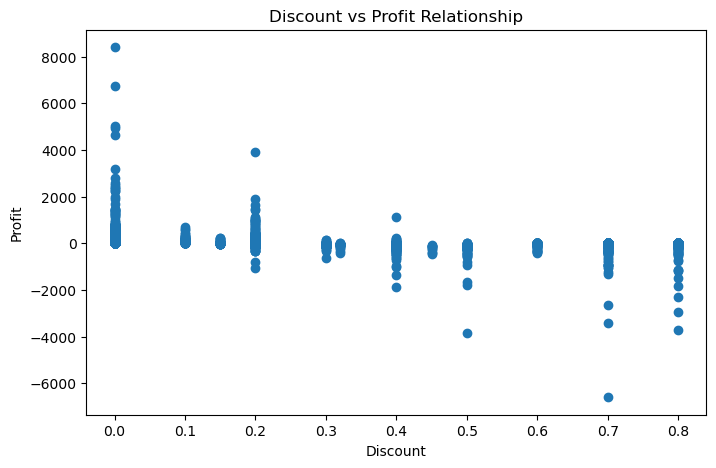

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Discount'], df['Profit'])
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Discount vs Profit Relationship")
plt.show()

In [20]:
loss_orders = df[df['Profit'] < 0]
loss_orders.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.400000
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-1.800000
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,-1.500000
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,-0.014286
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,-0.540000


In [21]:
loss_orders.shape

(1869, 14)

In [22]:
loss_orders.groupby('Category')['Profit'].sum().sort_values()

Category
Furniture         -60924.0502
Office Supplies   -56609.0215
Technology        -38579.9182
Name: Profit, dtype: float64


High Sales but Negative Profit

In [30]:
df[(df['Sales'] > df['Sales'].median()) & (df['Profit'] < 0)].head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.400000
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-1.800000
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,-0.014286
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,-0.540000
36,First Class,Corporate,United States,Richardson,Texas,75080,Central,Furniture,Furnishings,190.9200,5,0.60,-147.9630,-0.775000


Profit Risk Score

In [32]:
df['Risk Score'] = (
    df['Discount'] * 0.5 +
    (df['Profit'] < 0).astype(int) * 0.5
)

In [33]:
df.sort_values('Risk Score', ascending=False).head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin,Risk Score
741,Standard Class,Home Office,United States,Naperville,Illinois,60540,Central,Office Supplies,Binders,3.540,2,0.8,-5.4870,-1.55,0.9
8459,Standard Class,Consumer,United States,Houston,Texas,77070,Central,Office Supplies,Binders,12.384,3,0.8,-19.8144,-1.60,0.9
6386,First Class,Consumer,United States,Austin,Texas,78745,Central,Office Supplies,Binders,4.276,1,0.8,-6.6278,-1.55,0.9
3294,First Class,Consumer,United States,Dallas,Texas,75081,Central,Office Supplies,Binders,30.960,8,0.8,-52.6320,-1.70,0.9
679,Standard Class,Consumer,United States,Tyler,Texas,75701,Central,Office Supplies,Binders,182.994,3,0.8,-320.2395,-1.75,0.9
4267,Standard Class,Consumer,United States,Houston,Texas,77036,Central,Office Supplies,Binders,12.588,3,0.8,-20.1408,-1.60,0.9
8220,Standard Class,Consumer,United States,Dallas,Texas,75217,Central,Office Supplies,Binders,1.788,3,0.8,-3.0396,-1.70,0.9
3134,Standard Class,Home Office,United States,Dallas,Texas,75081,Central,Office Supplies,Binders,30.560,5,0.8,-45.8400,-1.50,0.9
8458,Standard Class,Consumer,United States,Houston,Texas,77070,Central,Office Supplies,Binders,25.680,3,0.8,-39.8040,-1.55,0.9
4130,Standard Class,Corporate,United States,Chicago,Illinois,60623,Central,Office Supplies,Binders,14.480,5,0.8,-23.8920,-1.65,0.9


In [38]:
query = """
SELECT "Sub-Category",
       SUM(Sales) as Sales,
       SUM(Profit) as Profit
FROM orders
GROUP BY "Sub-Category"
ORDER BY Profit ASC
LIMIT 10;
"""

pd.read_sql(query, conn)

,Sub-Category,Sales,Profit
0,Tables,206965.5320,-17725.4811
1,Bookcases,114879.9963,-3472.5560
2,Supplies,46673.5380,-1189.0995
3,Fasteners,3024.2800,949.5182
4,Machines,189238.6310,3384.7569
5,Labels,12444.9120,5526.3820
6,Art,27107.0320,6524.6118
7,Envelopes,16476.4020,6964.1767
8,Furnishings,91683.0240,13052.7230
9,Appliances,107532.1610,18138.0054


In [39]:
#Some sub-categories generate high revenue but produce negative profit due to aggressive discounting strategies.

Profit by Customer

In [41]:
pd.options.display.float_format = '{:,.2f}'.format

In [42]:
df.groupby('Segment')[['Sales','Profit']].sum().sort_values('Profit', ascending=False)

,Sales,Profit
Segment,,
Consumer,"1,160,832.77","134,007.44"
Corporate,"706,070.13","91,954.98"
Home Office,"429,292.68","60,279.00"


Average Profit per Order

In [43]:
df.groupby('Segment')['Profit'].mean()

Segment
Consumer      25.86
Corporate     30.50
Home Office   33.88
Name: Profit, dtype: float64

Segment Performance

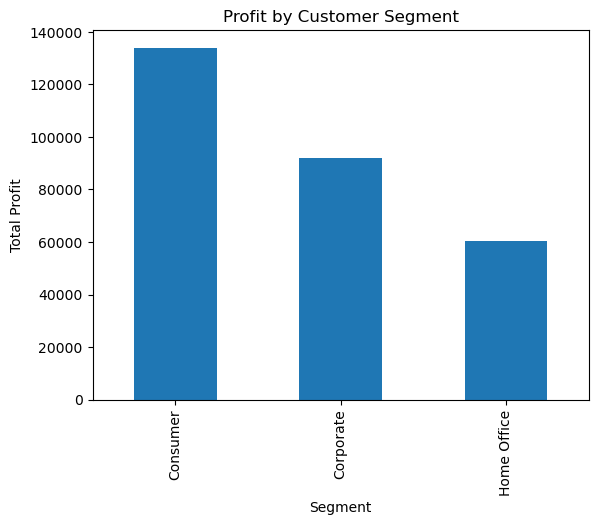

In [44]:
import matplotlib.pyplot as plt

df.groupby('Segment')['Profit'].sum().plot(kind='bar')
plt.title("Profit by Customer Segment")
plt.ylabel("Total Profit")
plt.show()

Regional Performance Analysis

In [45]:
df.groupby('Region')[['Sales','Profit']].sum()

,Sales,Profit
Region,,
Central,"500,782.85","39,655.88"
East,"678,435.20","91,506.31"
South,"391,721.91","46,749.43"
West,"725,255.64","108,329.81"


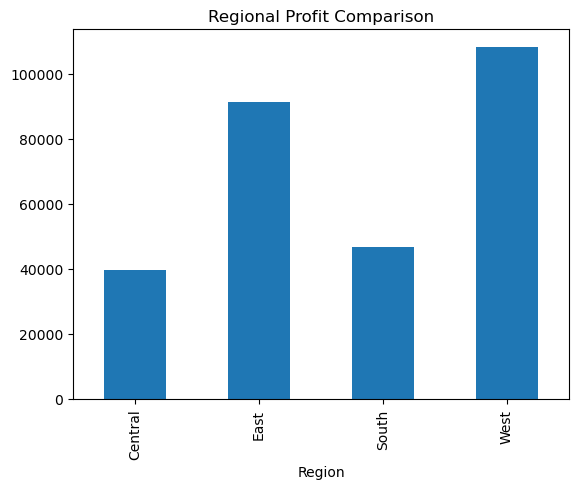

In [46]:
df.groupby('Region')['Profit'].sum().plot(kind='bar')
plt.title("Regional Profit Comparison")
plt.show()

Monthly Sales Trend

In [48]:
df.to_csv("../outputs/cleaned_retail_data.csv", index=False)

OSError: Cannot save file into a non-existent directory: '../outputs'